<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Precipitation_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading some packages

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr
import math
import numpy as np
from matplotlib import pyplot as plt

# Load forecast
## 7th of september 2018 a major precipitation event occured in Dueknipen, Kristiansand, Vest-Agder.

Record with 81.6, 102.0, 121.5 and 134.7 mm were set for 90, 120, 180 and 360 minutes respectively during this event. 
https://no.wikipedia.org/wiki/Norske_v%C3%A6rrekorder#Nedb%C3%B8r_2

# Goal

The aim of this exercise is to investigate wether this event was properly captured (or how it was captured) by the forecast or not. 

In [8]:
forecast_1

<xarray.Dataset>
Dimensions:                                                         (atmosphere_as_single_layer: 1, ensemble_member: 10, height0: 1, height1: 1, height3: 1, height_above_msl: 1, hybrid: 5, hybrid0: 1, hybrid2: 5, pressure: 5, time: 67, x: 889, y: 949)
Coordinates:
  * ensemble_member                                                 (ensemble_member) int16 0 ... 9
  * height0                                                         (height0) float32 0.0
  * hybrid2                                                         (hybrid2) float64 0.9862 ... 0.9985
  * pressure                                                        (pressure) float32 500.0 ... 1000.0
  * time                                                            (time) datetime64[ns] 2018-09-07 ... 2018-09-09T18:00:00
  * x                                                               (x) float32 -1022485.4 ... 1197514.6
  * y                                                               (y) float32 -1129330.6 ... 1240669.4
  * atmosphere_as_single_layer                                      (atmosphere_as_single_layer) int16 0
  * hybrid                                                          (hybrid) float64 0.9862 ... 0.9985
  * height1                                                         (height1) float32 2.0
  * height3                                                         (height3) float32 10.0
  * height_above_msl                                                (height_above_msl) float32 0.0
  * hybrid0                                                         (hybrid0) float64 0.9985
    latitude                                                        (y, x) float64 51.85 ... 71.16
    longitude                                                       (y, x) float64 0.238 ... 49.61
Data variables:
    forecast_reference_time                                         datetime64[ns] ...
    ap2                                                             (hybrid2) float64 ...
    b2                                                              (hybrid2) float64 ...
    p02                                                             float64 ...
    projection_lambert                                              int32 ...
    ap                                                              (hybrid) float64 ...
    b                                                               (hybrid) float64 ...
    p0                                                              float64 ...
    ap0                                                             (hybrid0) float64 ...
    b0                                                              (hybrid0) float64 ...
    p00                                                             float64 ...
    air_temperature_0m                                              (time, height0, ensemble_member, y, x) float32 ...
    atmosphere_boundary_layer_thickness                             (time, height0, ensemble_member, y, x) float32 ...
    downward_eastward_momentum_flux_in_air                          (time, height0, ensemble_member, y, x) float32 ...
    downward_northward_momentum_flux_in_air                         (time, height0, ensemble_member, y, x) float32 ...
    geopotential_ml                                                 (time, hybrid2, ensemble_member, y, x) float64 ...
    high_type_cloud_area_fraction                                   (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_downward_sensible_heat_flux_wrt_time        (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_downwelling_longwave_flux_in_air_wrt_time   (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time  (time, height0, ensemble_member, y, x) float32 ...
    integral_of_surface_net_downward_shortwave_flux_wrt_time        (time, height0, ensemble_member, y, x) float32 ...
    liquid_water_content_of_surface_snow                 

In [3]:
year =  '2018'
day  =  '07'
month = '09'
hour_1  ='00'

#url='https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_extracted_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
url = 'https://thredds.met.no/thredds/dodsC/meps25epsarchive/' +year+'/'+month+'/'+day+'/meps_subset_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)
#/2018/09/07/meps_subset_2_5km_20180907T00Z.nc.html

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: The following kwargs were not used by contour: 'extemd'


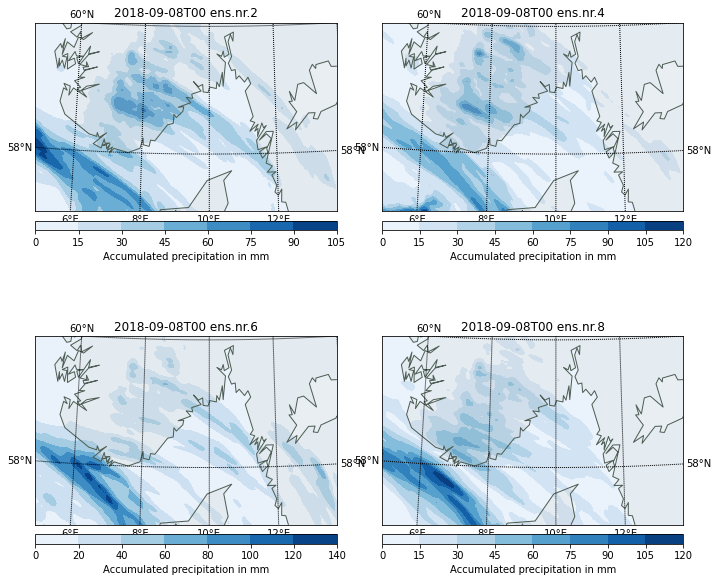

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
timestep_1=24
mlevel=0
memb1=2 # Ensemble member
memb2 = 4
memb3 = 6
memb4 = 8

fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
gs = gridspec.GridSpec(2,2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 57.0, urcrnrlat=60.0, llcrnrlon=5.0, urcrnrlon=14.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb1,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb1))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')      

ax = plt.subplot(gs[1],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb2,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb2))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

ax = plt.subplot(gs[2],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb3,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb3))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

ax = plt.subplot(gs[3],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep_1,mlevel,memb4,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" ens.nr."+str(memb4))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

# Ensemble mean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'extemd'


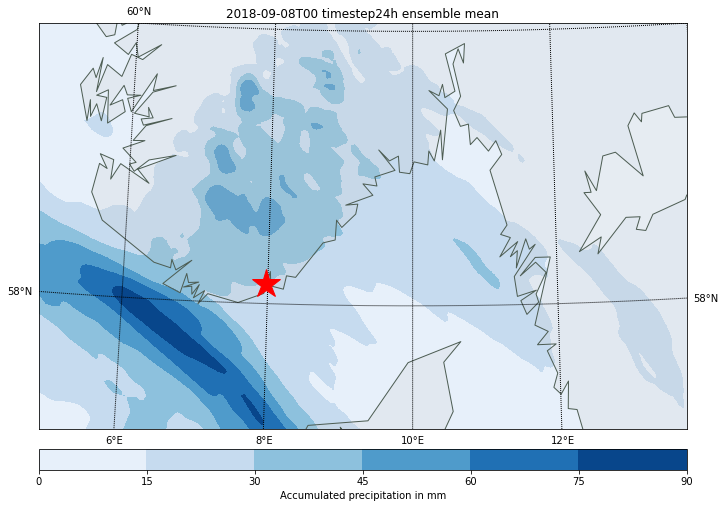

In [ ]:
fig = plt.figure(figsize=(10,10)) #11.7
fig.tight_layout()
#gs = gridspec.GridSpec(1,2)
timestep_1 = 24
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 57.0, urcrnrlat=60.0, llcrnrlon=5.0, urcrnrlon=14.0)
precip1 = forecast_1.precipitation_amount_acc.isel(time = timestep_1, height0 = 0)
precip_mean = precip1.mean(dim = 'ensemble_member')
#ax = plt.subplot(gs[4],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,2); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,2); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(precip_mean[:,:]),cmap=plt.cm.Blues,extemd='max')
#a, b = m(58,8)#58.142814, 7.977978)
#m.plot(b,a, 'ok', markersize=50)
NYClat, NYClon = 58.142814, 7.977978 #40.7127, -74.0059
xpt, ypt = m(NYClon, NYClat)
m.plot(xpt, ypt, 'c*',color='r', markersize=30)
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h')+" timestep"+str(timestep_1)+"h ensemble mean")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accumulated precipitation in mm')  

In [5]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identic*l location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [6]:
[ix,jx] = findindex(forecast_1.latitude,forecast_1.longitude,58.142814, 7.977978) # Dueknipen, Kristiansand (usikkert akkurat hvor målestasjon er)
#precipitation_amount_acc[timestep_1,mlevel,memb4,:,:]
precip = forecast_1.precipitation_amount_acc.isel(height0=0) #to make varaible
#and remove height as varaible
precip_mean = precip.mean(dim = 'ensemble_member')
pres_std = precip.std(dim = 'ensemble_member')

# Point forecast for Dueknipen, Kristiansand

Text(0, 0.5, 'accumulated mm timestep 24h')

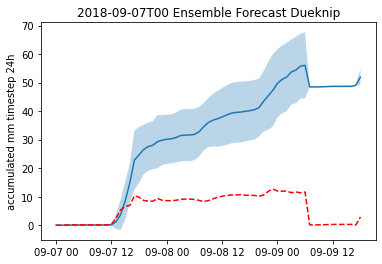

In [10]:
plt.plot(forecast_1.time,precip_mean[:,ix,jx])
#plt.plot(forecast_1.time,precip_mean[:,ix,jx]-pres_std[:,ix,jx])
plt.fill_between(forecast_1.time,precip_mean[:,ix,jx]+
                 pres_std[:,ix,jx],precip_mean[:,ix,jx]-pres_std[:,ix,jx],
                 alpha=0.3)
plt.plot(forecast_1.time,pres_std[:,ix,jx],'--',color='red')
plt.title (np.datetime_as_string(forecast_1.time[int(hour_1)],unit='h')+" Ensemble Forecast Dueknip")
plt.ylabel("accumulated mm timestep "+str(timestep_1)+"h")

In [23]:
precip_count = []
for i in range(len(precip_mean)):
  precip_count.append(precip_mean[i,ix,jx]-precip_mean[i-1,ix,jx])

(0.0, 10.0)

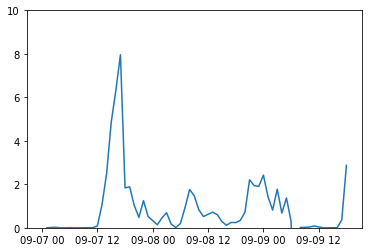

In [38]:
fig, ax = plt.subplots()
ax.plot(forecast_1.time,precip_count)
ax.set_ylim(0,10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'extemd'


TypeError: ignored

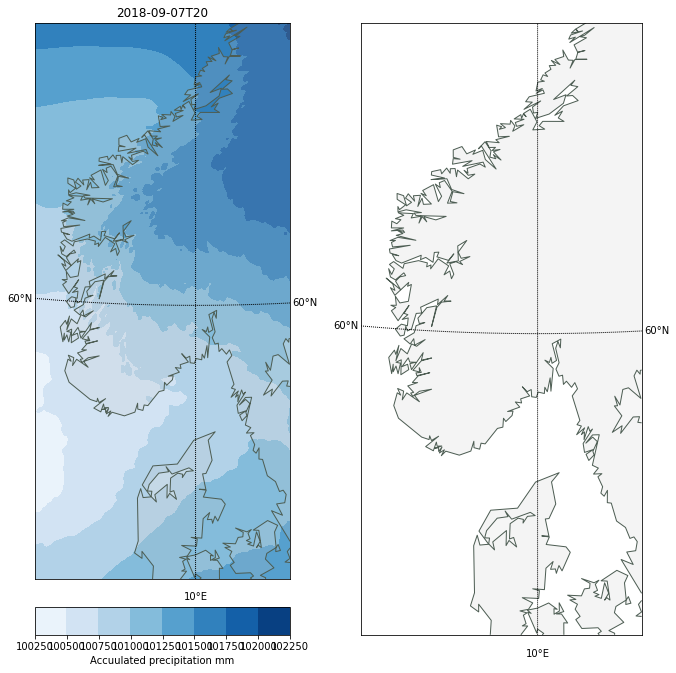

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep_1=20
mlevel=0
memb=5

fig = plt.figure(figsize=(15,10)) #11.7
gs = gridspec.GridSpec(1,3)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=10, lat_0=60.4, 
            resolution='l', 
            llcrnrlat= 55.0, urcrnrlat=65.0, llcrnrlon=5.0, urcrnrlon=14.0)

ax = plt.subplot(gs[0],aspect='equal')  
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.air_pressure_at_sea_level[timestep_1,mlevel,memb,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accuulated precipitation mm')             

ax = plt.subplot(gs[1],aspect='equal')  
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(precip_mean[:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accuulated precipitation mm')    

ax = plt.subplot(gs[2],aspect='equal')  
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(pres_std[timestep_1,:,:]),cmap=plt.cm.Blues,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Accuulated precipitation mm') 